### Universidade Federal do Ceará (Centro de Ciências)
#### CK0223 – Mineração de Dados - 2021.2
**Aluno:** **Francisco Luan Rodrigues De Sousa, matrícula - 471459**


**Professor:** **Dr. José Maria**

**--------------------- CLUSTERING (Agrupamento) COM MÉTODO K-MEANS -----------------------**

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
#Dataset do primeiro trabalho de mineração de dados com os dados dos maiores Estados do brasil que são icentivadores e o ano deles que foi scrapitado do site do Ministério da Cultura. 

df = pd.read_csv('icentivadores.csv', engine = 'python', sep = ';', index_col = [0])

In [4]:
df

,RESUMO,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,FISICA,0.0,24.0,181.0,1.438,1.79,1.867,3.531,2.998,3.215,...,7.917,9.645,12.368,12.071,11.722,13804,13.495,11.906,1340,228134.00
1,Centro Oeste,0.0,0.0,2.0,52.000,18.00,27.000,92.000,19.000,11.000,...,145.000,822.000,1.209,1.004,882.000,1120,555.000,451.000,60000,37715.00
2,Nordeste,0.0,0.0,0.0,21.000,23.00,37.000,60.000,19.000,25.000,...,104.000,250.000,481.000,320.000,396.000,603000,524.000,318.000,56000,10137.00
3,Norte,0.0,0.0,0.0,1.000,0.00,17.000,30.000,4.000,4.000,...,20.000,63.000,128.000,84.000,80.000,111000,75.000,61.000,9000,2.08
4,Sudeste,0.0,0.0,31.0,503.000,974.00,1.322,1.659,1.395,1.727,...,6.616,7.305,8.952,9.309,8.782,9875,9.794,9.207,938000,139386.00
5,Sul,0.0,24.0,148.0,861.000,775.00,464.000,1.690,1.561,1.448,...,1.032,1.205,1.598,1.354,1.582,2095,2.547,1.869,277000,38816.00
6,JURIDICA,2.0,19.0,69.0,732.000,1123.00,1.065,1.249,1.334,1.173,...,3.469,3.507,3.385,3.067,3.354,3734,3.989,3.598,1831,62.08
7,Centro Oeste,1.0,1.0,7.0,37.000,39.00,53.000,67.000,75.000,56.000,...,135.000,130.000,125.000,124.000,117.000,149000,164.000,184.000,62000,2642.00
8,Nordeste,0.0,0.0,2.0,42.000,76.00,44.000,72.000,76.000,61.000,...,208.000,212.000,213.000,200.000,227.000,277000,282.000,270.000,174000,4118.00
9,Norte,0.0,0.0,0.0,4.000,3.00,300.000,11.000,19.000,20.000,...,53.000,71.000,50.000,56.000,49.000,74000,73.000,75.000,40000,1032.00


In [5]:
#Preferi remover uma linha completa(12) que era as conatgens total de cada coluna, isso iria atrapalhar com a análise estatística. 

df = df.drop(index = 12)

In [6]:
df

,RESUMO,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,FISICA,0.0,24.0,181.0,1.438,1.79,1.867,3.531,2.998,3.215,...,7.917,9.645,12.368,12.071,11.722,13804,13.495,11.906,1340,228134.00
1,Centro Oeste,0.0,0.0,2.0,52.000,18.00,27.000,92.000,19.000,11.000,...,145.000,822.000,1.209,1.004,882.000,1120,555.000,451.000,60000,37715.00
2,Nordeste,0.0,0.0,0.0,21.000,23.00,37.000,60.000,19.000,25.000,...,104.000,250.000,481.000,320.000,396.000,603000,524.000,318.000,56000,10137.00
3,Norte,0.0,0.0,0.0,1.000,0.00,17.000,30.000,4.000,4.000,...,20.000,63.000,128.000,84.000,80.000,111000,75.000,61.000,9000,2.08
4,Sudeste,0.0,0.0,31.0,503.000,974.00,1.322,1.659,1.395,1.727,...,6.616,7.305,8.952,9.309,8.782,9875,9.794,9.207,938000,139386.00
5,Sul,0.0,24.0,148.0,861.000,775.00,464.000,1.690,1.561,1.448,...,1.032,1.205,1.598,1.354,1.582,2095,2.547,1.869,277000,38816.00
6,JURIDICA,2.0,19.0,69.0,732.000,1123.00,1.065,1.249,1.334,1.173,...,3.469,3.507,3.385,3.067,3.354,3734,3.989,3.598,1831,62.08
7,Centro Oeste,1.0,1.0,7.0,37.000,39.00,53.000,67.000,75.000,56.000,...,135.000,130.000,125.000,124.000,117.000,149000,164.000,184.000,62000,2642.00
8,Nordeste,0.0,0.0,2.0,42.000,76.00,44.000,72.000,76.000,61.000,...,208.000,212.000,213.000,200.000,227.000,277000,282.000,270.000,174000,4118.00
9,Norte,0.0,0.0,0.0,4.000,3.00,300.000,11.000,19.000,20.000,...,53.000,71.000,50.000,56.000,49.000,74000,73.000,75.000,40000,1032.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RESUMO  12 non-null     object 
 1   1993    12 non-null     float64
 2   1994    12 non-null     float64
 3   1995    12 non-null     float64
 4   1996    12 non-null     float64
 5   1997    12 non-null     float64
 6   1998    12 non-null     float64
 7   1999    12 non-null     float64
 8   2000    12 non-null     float64
 9   2001    12 non-null     float64
 10  2002    12 non-null     float64
 11  2003    12 non-null     float64
 12  2004    12 non-null     float64
 13  2005    12 non-null     float64
 14  2006    12 non-null     float64
 15  2007    12 non-null     float64
 16  2008    12 non-null     float64
 17  2009    12 non-null     float64
 18  2010    12 non-null     float64
 19  2011    12 non-null     float64
 20  2012    12 non-null     float64
 21  2013    12 non-null     float64
 22  2014

In [8]:
df.head()

,RESUMO,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,FISICA,0.0,24.0,181.0,1.438,1.79,1.867,3.531,2.998,3.215,...,7.917,9.645,12.368,12.071,11.722,13804,13.495,11.906,1340,228134.00
1,Centro Oeste,0.0,0.0,2.0,52.000,18.00,27.000,92.000,19.000,11.000,...,145.000,822.000,1.209,1.004,882.000,1120,555.000,451.000,60000,37715.00
2,Nordeste,0.0,0.0,0.0,21.000,23.00,37.000,60.000,19.000,25.000,...,104.000,250.000,481.000,320.000,396.000,603000,524.000,318.000,56000,10137.00
3,Norte,0.0,0.0,0.0,1.000,0.00,17.000,30.000,4.000,4.000,...,20.000,63.000,128.000,84.000,80.000,111000,75.000,61.000,9000,2.08
4,Sudeste,0.0,0.0,31.0,503.000,974.00,1.322,1.659,1.395,1.727,...,6.616,7.305,8.952,9.309,8.782,9875,9.794,9.207,938000,139386.00


In [9]:
df_variables= df.drop(['RESUMO'], axis = 1)

In [10]:
df_variables.describe()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.333333,7.166667,41.666667,241.953167,336.482500,157.021167,119.927417,115.274000,101.713583,111.824000,...,57.258917,131.063000,85.62575,67.791000,148.283417,103988.500000,142.191250,115.720750,264514.250000,43027.680000
std,0.651339,10.142918,61.646106,312.270286,439.950775,234.626707,231.967790,251.611896,218.935016,244.135807,...,72.186878,234.146986,142.54536,101.385372,260.268418,178602.060707,203.974442,153.794219,353205.925865,69996.456578
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.065000,1.249000,1.334000,1.173000,1.173000,...,1.032000,1.205000,1.20900,1.004000,1.217000,1120.000000,1.558000,1.296000,1340.000000,2.080000
25%,0.000000,0.000000,1.500000,16.750000,14.250000,13.216750,3.070750,2.638750,2.843000,2.776000,...,3.049750,3.076750,1.71725,1.546750,2.951500,2023.250000,3.628500,3.165750,32250.000000,2239.500000
50%,0.000000,0.500000,11.500000,47.000000,57.500000,40.500000,45.000000,19.000000,15.500000,21.000000,...,13.958500,36.322500,10.66000,10.690000,30.361000,11839.500000,43.247500,36.453000,61000.000000,14982.000000
75%,0.250000,16.000000,50.250000,458.000000,778.500000,222.000000,77.000000,75.250000,57.250000,63.000000,...,111.750000,150.500000,125.75000,94.000000,144.500000,120500.000000,193.500000,205.500000,391250.000000,37990.250000
max,2.000000,24.000000,181.000000,861.000000,1123.000000,742.000000,812.000000,870.000000,749.000000,841.000000,...,208.000000,822.000000,481.00000,320.000000,882.000000,603000.000000,555.000000,451.000000,938000.000000,228134.000000


In [11]:
df_norm = (df_variables-df_variables.min())/(df_variables.max()-df_variables.min())
df_norm

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,0.0,1.000000,1.000000,0.000509,0.001594,0.001082,0.002815,0.001916,0.002731,0.002559,...,0.033266,0.010283,0.023258,0.034693,0.011927,0.021074,0.021569,0.023593,0.000000,1.000000
1,0.0,0.000000,0.011050,0.059302,0.016028,0.035003,0.111934,0.020337,0.013141,0.024799,...,0.695605,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.062627,0.165312
2,0.0,0.000000,0.000000,0.023256,0.020481,0.048500,0.072465,0.020337,0.031862,0.022418,...,0.497507,0.303115,1.000000,1.000000,0.448218,1.000000,0.943987,0.704250,0.058356,0.044426
3,0.0,0.000000,0.000000,0.000000,0.000000,0.021507,0.035462,0.003069,0.003780,0.002175,...,0.091647,0.075287,0.264263,0.260179,0.089447,0.182561,0.132700,0.132763,0.008178,0.000000
4,0.0,0.000000,0.171271,0.583721,0.867320,0.000347,0.000506,0.000070,0.000741,0.001109,...,0.026980,0.007432,0.016138,0.026035,0.008589,0.014546,0.014881,0.017592,1.000000,0.610979
5,0.0,1.000000,0.817680,1.000000,0.690116,0.624798,0.000544,0.000261,0.000368,0.000000,...,0.000000,0.000000,0.000811,0.001097,0.000414,0.001620,0.001787,0.001274,0.294301,0.170138
6,1.0,0.791667,0.381215,0.850000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000138,...,0.011775,0.002805,0.004535,0.006467,0.002426,0.004343,0.004393,0.005119,0.000524,0.000263
7,0.5,0.041667,0.038674,0.041860,0.034728,0.070094,0.081099,0.084804,0.073315,0.072428,...,0.647288,0.156915,0.258010,0.385572,0.131455,0.245697,0.293512,0.406276,0.064762,0.011572
8,0.0,0.000000,0.011050,0.047674,0.067676,0.057947,0.087266,0.085955,0.080001,0.077191,...,1.000000,0.256818,0.441423,0.623820,0.256344,0.458364,0.506723,0.597513,0.184336,0.018042
9,0.0,0.000000,0.000000,0.003488,0.002671,0.403456,0.012027,0.020337,0.025176,0.024799,...,0.251092,0.085033,0.101692,0.172403,0.054251,0.121087,0.129087,0.163894,0.041274,0.004515


In [12]:
df_norm.describe()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.166667,0.298611,0.230203,0.280178,0.299628,0.210486,0.146381,0.131167,0.134444,0.131755,...,0.271670,0.158210,0.175945,0.209366,0.166972,0.170912,0.254107,0.254445,0.280971,0.188600
std,0.325669,0.422622,0.340586,0.363105,0.391764,0.316663,0.286115,0.289653,0.292762,0.290698,...,0.348783,0.285269,0.297099,0.317826,0.295497,0.296740,0.368556,0.341990,0.377091,0.306824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.008287,0.018314,0.012689,0.016401,0.002247,0.001502,0.002233,0.001909,...,0.009749,0.002280,0.001059,0.001701,0.001969,0.001501,0.003741,0.004158,0.033000,0.009808
50%,0.000000,0.020833,0.063536,0.053488,0.051202,0.053223,0.053964,0.020337,0.019158,0.023608,...,0.062457,0.042785,0.019698,0.030364,0.033089,0.017810,0.075328,0.078178,0.063694,0.065663
75%,0.125000,0.666667,0.277624,0.531395,0.693232,0.298184,0.093433,0.085091,0.074987,0.073619,...,0.534952,0.181891,0.259573,0.291527,0.162677,0.198345,0.346815,0.454085,0.416277,0.166518
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

C:\Users\Luan Sousa\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


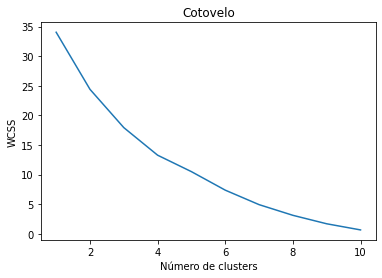

In [14]:
plt.plot(range(1,11), wcss)
plt.title("Cotovelo")
plt.xlabel("Número de clusters")
plt.ylabel('WCSS')
plt.show()

In [15]:
clustering = KMeans(n_clusters = 3, max_iter = 300)
clustering.fit(df_norm)

KMeans(n_clusters=3)

In [16]:
df['KMeans_Clusters'] = clustering.labels_
df.head()

,RESUMO,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,Total,KMeans_Clusters
0,FISICA,0.0,24.0,181.0,1.438,1.79,1.867,3.531,2.998,3.215,...,9.645,12.368,12.071,11.722,13804,13.495,11.906,1340,228134.00,0
1,Centro Oeste,0.0,0.0,2.0,52.000,18.00,27.000,92.000,19.000,11.000,...,822.000,1.209,1.004,882.000,1120,555.000,451.000,60000,37715.00,1
2,Nordeste,0.0,0.0,0.0,21.000,23.00,37.000,60.000,19.000,25.000,...,250.000,481.000,320.000,396.000,603000,524.000,318.000,56000,10137.00,1
3,Norte,0.0,0.0,0.0,1.000,0.00,17.000,30.000,4.000,4.000,...,63.000,128.000,84.000,80.000,111000,75.000,61.000,9000,2.08,1
4,Sudeste,0.0,0.0,31.0,503.000,974.00,1.322,1.659,1.395,1.727,...,7.305,8.952,9.309,8.782,9875,9.794,9.207,938000,139386.00,0


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(df_norm)
pca_df_df = pd.DataFrame(data = pca_df, columns = ['ex_1', 'ex_2'])
pca_nomes_df = pd.concat([pca_df_df, df [['KMeans_Clusters']]], axis = 1)

pca_nomes_df

,ex_1,ex_2,KMeans_Clusters
0,-0.496530,-0.763904,0
1,1.040618,-0.518856,1
2,1.919194,0.012149,1
3,0.438874,0.088513,1
4,-0.600409,-0.284167,0
5,-1.269336,-0.552163,0
6,-0.876757,-0.746927,0
7,0.553003,-0.029080,1
8,1.033780,0.200454,1
9,0.222762,-0.171173,1


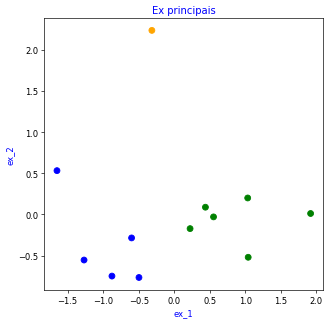

In [18]:
fig = plt.figure(figsize = (6,6), dpi = 60)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('ex_1', color = "blue")
ax.set_ylabel('ex_2', color= "blue")
ax.set_title('Ex principais', color = "blue")

color_theme = np.array(['blue', 'green', 'orange'])
ax.scatter(x = pca_nomes_df.ex_1, y = pca_nomes_df.ex_2 , 
           c= color_theme[pca_nomes_df.KMeans_Clusters], s=50)

plt.show()

